# Data Collection and Preprocessing

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import math
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [3]:
# Load the dataset
data = pd.read_csv('/Users/owner/Library/CloudStorage/OneDrive-Personal/Project4/combined_world_data.csv')


In [4]:
# Remove missing data
data.dropna(inplace=True) 

In [5]:
# Remove duplicate records
data.drop_duplicates(inplace=True)

In [6]:
# Set the maximum number of columns and rows to display
pd.set_option('display.max_columns', data.shape[1])
pd.set_option('display.max_rows', data.shape[0])

# Display the DataFrame
print(data)

                              Country ISO-code  Fertility  Life expectancy  \
0                         Afghanistan      AFG       4.50            64.50   
2                             Algeria      DZA       3.00            76.70   
4                              Angola      AGO       5.50            60.80   
5                 Antigua and Barbuda      ATG       2.00            76.90   
6                           Argentina      ARG       2.30            76.50   
7                             Armenia      ARM       1.80            74.90   
9                           Australia      AUS       1.70            83.30   
10                            Austria      AUT       1.50            81.40   
11                         Azerbaijan      AZE       1.70            72.90   
12                            Bahrain      BHR       2.00            77.20   
13                         Bangladesh      BGD       2.00            72.30   
14                           Barbados      BRB       1.60       

In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Country', 'ISO-code'] 
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [8]:
# Specify the numerical columns
numerical_columns = ['Life expectancy', 'Fertility', 'Median age', 'Population growth', 'Sex-ratio', 'Suicide rate', 'Urbanization rate']

# Create a separate DataFrame for numerical columns
numerical_data = data[numerical_columns]

# Scale numerical variables
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Create a new DataFrame with scaled numerical variables
scaled_data = pd.DataFrame(scaled_numerical_data, columns=numerical_columns, index=data.index)

# Combine the scaled data with the 'Country' column
data_with_country = pd.concat([data['Country'], scaled_data], axis=1)

In [9]:

# Set the maximum number of columns and rows to display
pd.set_option('display.max_columns', data_with_country.shape[1])
pd.set_option('display.max_rows', data_with_country.shape[0])

# Display the DataFrame
print(data_with_country)

     Country  Life expectancy  Fertility  Median age  Population growth  \
0          0        -0.972656   1.382459   -0.223291           0.775982   
2          1         0.628066   0.195233   -0.143625           0.355940   
4          2        -1.458121   2.173943   -1.532087           1.349501   
5          3         0.654307  -0.596251    0.288847          -0.338745   
6          4         0.601824  -0.358806    0.266085          -0.459911   
7          5         0.391894  -0.754548    0.653034          -1.033430   
9          6         1.494030  -0.833697    1.062744           0.121686   
10         7         1.244737  -0.991993    1.665928          -0.799176   
11         8         0.129480  -0.833697    0.334370          -0.080258   
12         9         0.693669  -0.596251    0.334370           0.380173   
13        10         0.050756  -0.596251   -0.302957          -0.209501   
14        11         0.942962  -0.912845    1.051363          -0.766865   
15        12         0.35

In [10]:
# Select all the variables except the target variable
X = data_with_country[['Country', 'Life expectancy', 'Fertility', 'Median age', 'Population growth', 'Sex-ratio', 'Suicide rate', 'Urbanization rate']]

# Target variable
y = data_with_country['Life expectancy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (136, 8) (136,)
Test set shape: (35, 8) (35,)


# Exploratory Data Analysis (EDA)

In [12]:
# Get an overview of the dataset
print("Dataset Overview:")
print(data_with_country.head())
print("\nDataset Shape:", data.shape)
print("\nDataset Columns:", data.columns)

Dataset Overview:
   Country  Life expectancy  Fertility  Median age  Population growth  \
0        0        -0.972656   1.382459   -0.223291           0.775982   
2        1         0.628066   0.195233   -0.143625           0.355940   
4        2        -1.458121   2.173943   -1.532087           1.349501   
5        3         0.654307  -0.596251    0.288847          -0.338745   
6        4         0.601824  -0.358806    0.266085          -0.459911   

   Sex-ratio  Suicide rate  Urbanization rate  
0   0.257158     -0.630461          -1.488330  
2   0.257158     -1.179062           0.663327  
4  -0.322400     -0.188041           0.352081  
5  -0.757069     -1.674572          -1.560503  
6  -0.105066     -0.152648           1.493316  

Dataset Shape: (171, 10)

Dataset Columns: Index(['Country', 'ISO-code', 'Fertility', 'Life expectancy',
       'Population growth', 'Sex-ratio', 'Suicide rate', 'Urbanization rate',
       'Median age', 'Year'],
      dtype='object')


In [13]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Country              0
ISO-code             0
Fertility            0
Life expectancy      0
Population growth    0
Sex-ratio            0
Suicide rate         0
Urbanization rate    0
Median age           0
Year                 0
dtype: int64


In [14]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
          Country    ISO-code   Fertility  Life expectancy  ...  Suicide rate  \
count  171.000000  171.000000  171.000000       171.000000  ...    171.000000   
mean    84.128655   84.111111    2.753333        71.913158  ...      9.962573   
std     48.772049   48.796027    1.267160         7.643945  ...      5.667337   
min      0.000000    0.000000    1.100000        52.800000  ...      0.400000   
25%     42.500000   42.500000    1.700000        66.200000  ...      6.000000   
50%     84.000000   84.000000    2.300000        73.100000  ...      9.200000   
75%    126.000000  126.500000    3.650000        77.150000  ...     12.900000   
max    168.000000  168.000000    6.100000        84.500000  ...     30.200000   

       Urbanization rate  Median age    Year  
count         171.000000  171.000000   171.0  
mean           58.994737   29.361988  2020.0  
std            22.234068    8.812505     0.0  
min            13.300000   15.400000  2020.0  
25%       

In [15]:
# Correlation analysis
print("\nCorrelation Matrix:")
correlation_matrix = data_with_country.corr()
print(correlation_matrix)


Correlation Matrix:
                    Country  Life expectancy  Fertility  Median age  \
Country            1.000000        -0.049319   0.060836   -0.064326   
Life expectancy   -0.049319         1.000000  -0.855923    0.822319   
Fertility          0.060836        -0.855923   1.000000   -0.864491   
Median age        -0.064326         0.822319  -0.864491    1.000000   
Population growth  0.090752        -0.542319   0.712770   -0.769516   
Sex-ratio          0.103080         0.054249  -0.026512   -0.079935   
Suicide rate       0.036749        -0.271926   0.101046    0.027916   
Urbanization rate -0.079949         0.623735  -0.560309    0.563791   

                   Population growth  Sex-ratio  Suicide rate  \
Country                     0.090752   0.103080      0.036749   
Life expectancy            -0.542319   0.054249     -0.271926   
Fertility                   0.712770  -0.026512      0.101046   
Median age                 -0.769516  -0.079935      0.027916   
Population gro

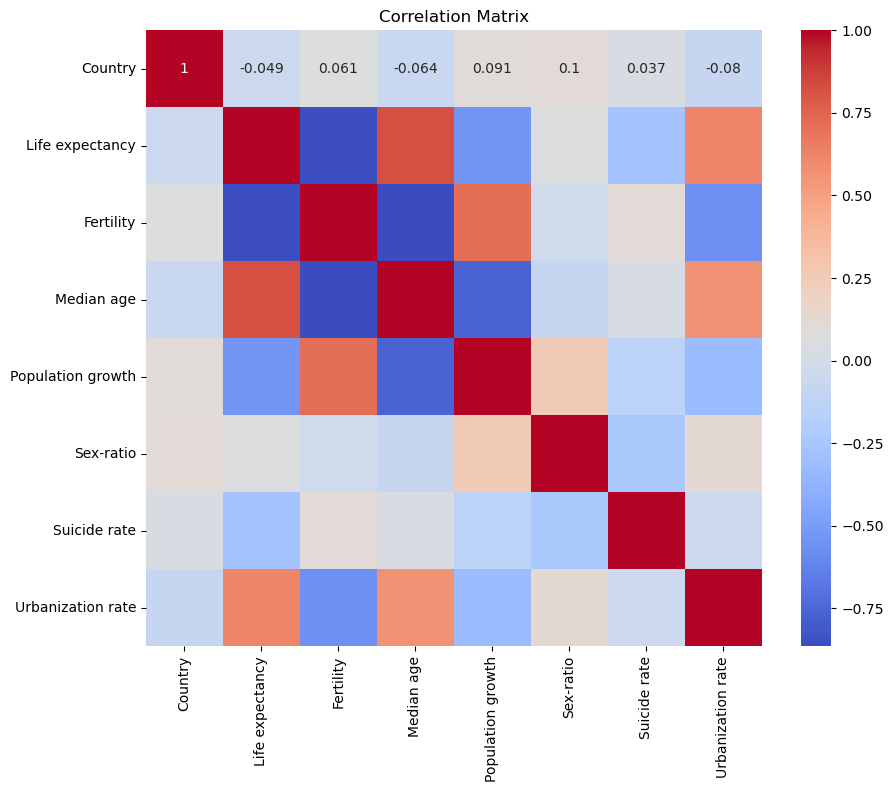

In [16]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

/Users/owner/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/owner/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/owner/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/owner/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

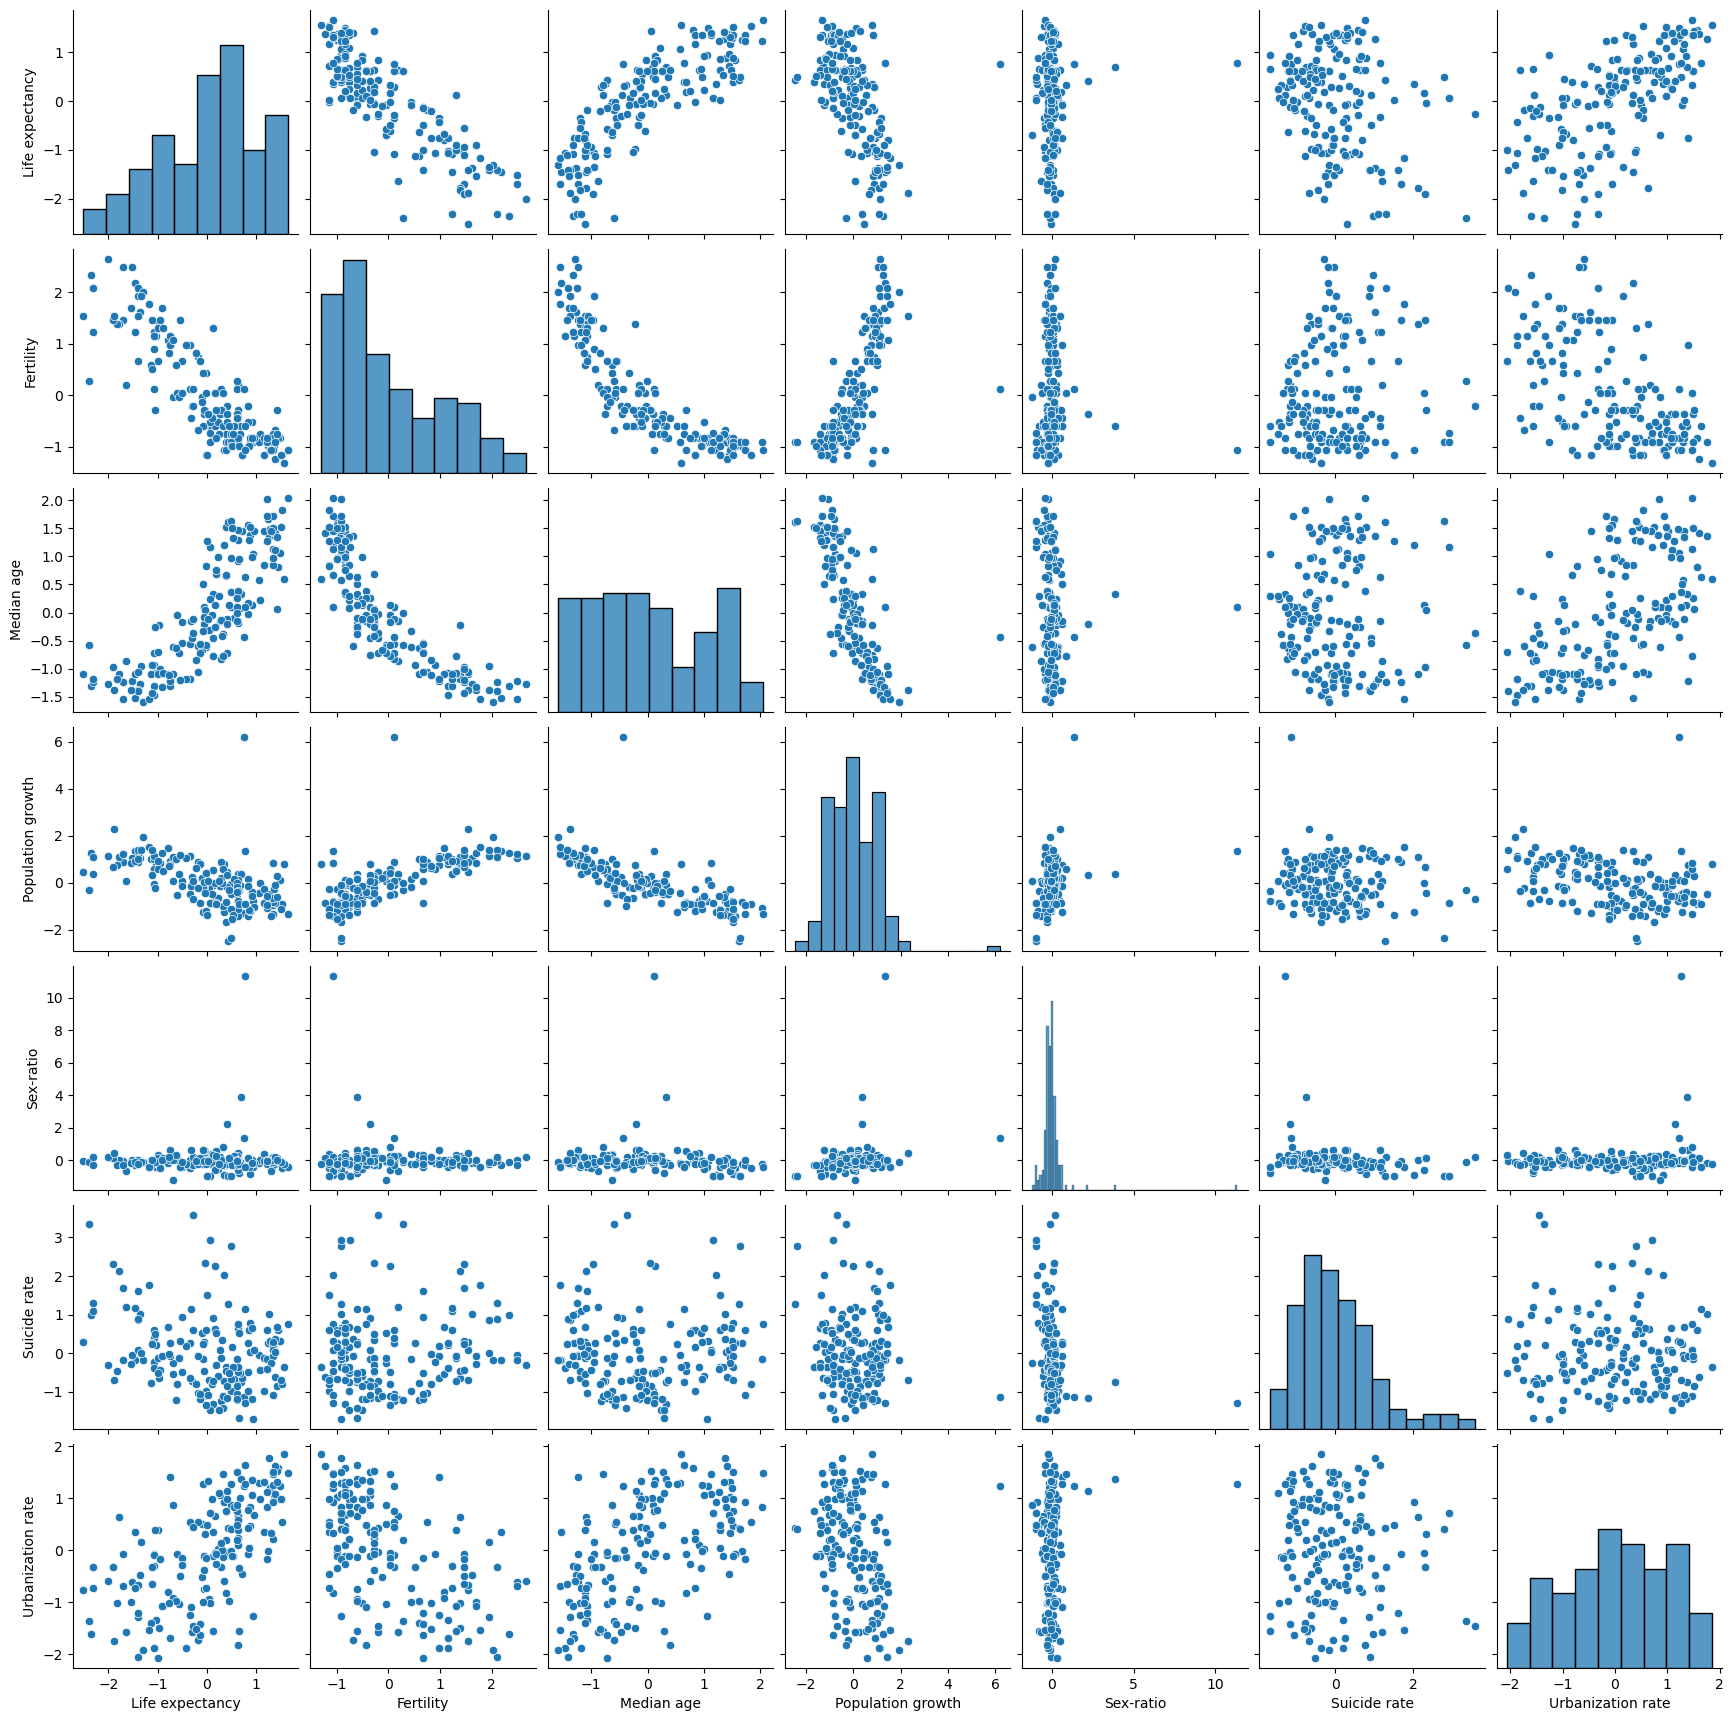

In [17]:
# Pairplot to visualize pairwise relationships
sns.pairplot(data_with_country.drop(['Country'], axis=1))
plt.show()

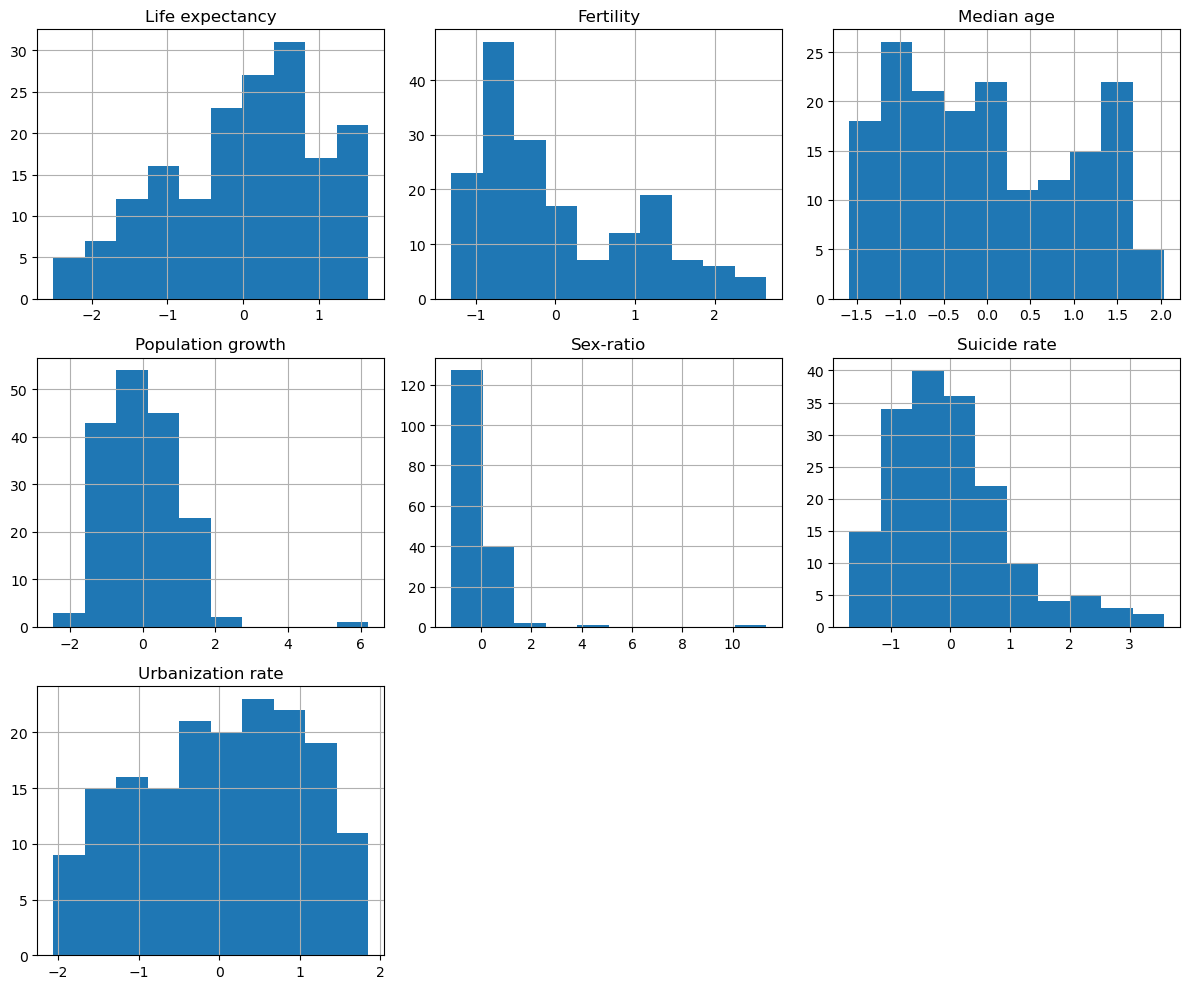

In [18]:
# Distribution plots for each variable
data_with_country.drop(['Country'], axis=1).hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

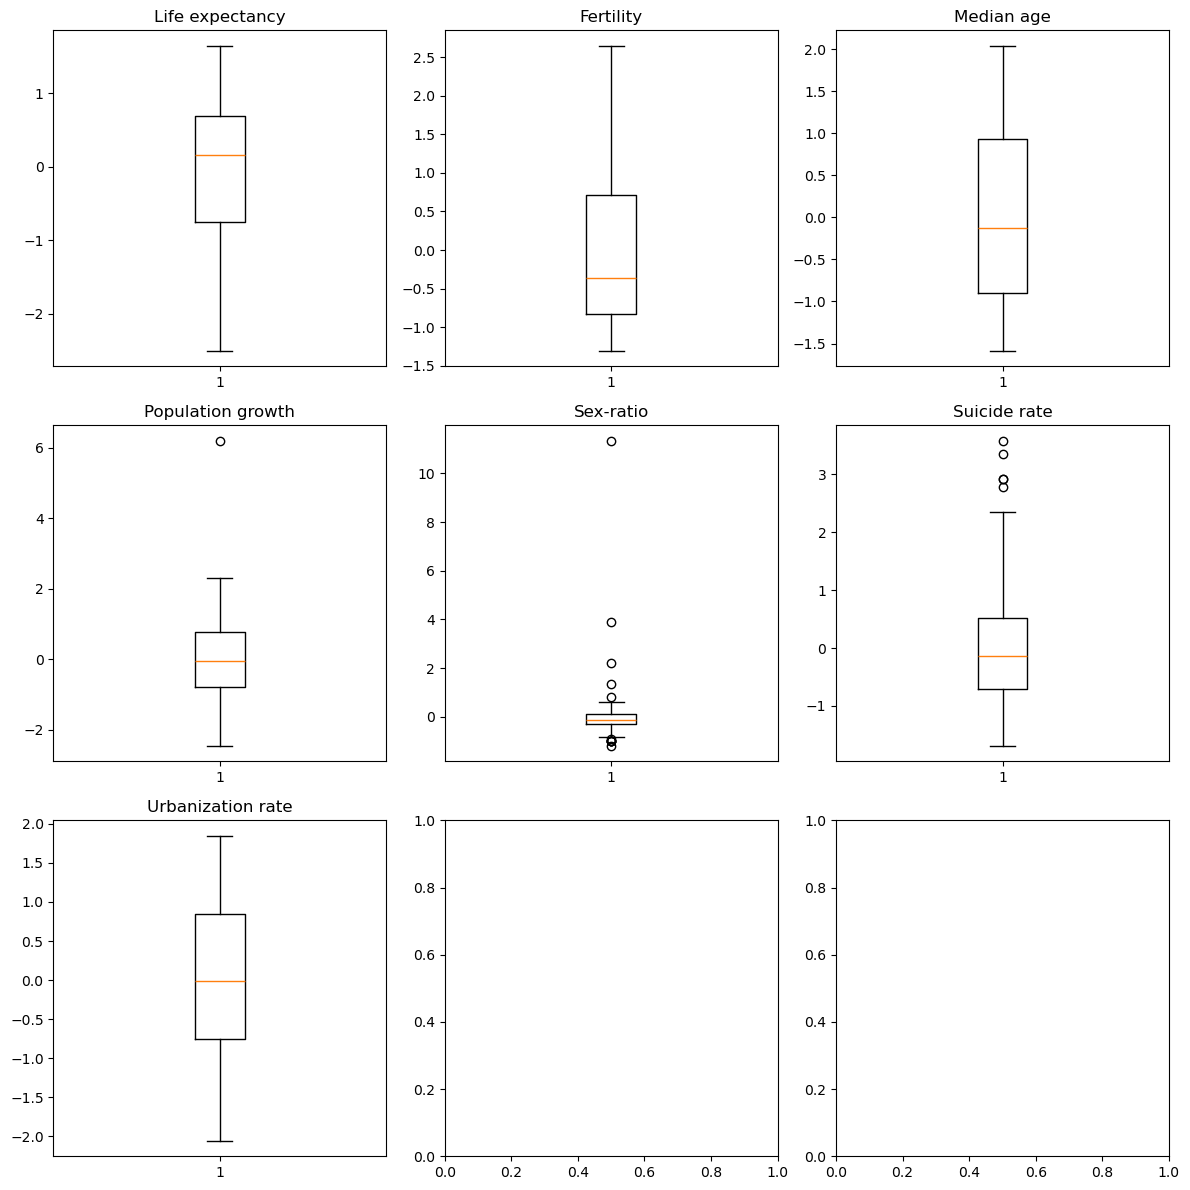

In [19]:
import math

# Calculate the number of rows and columns needed for the subplots
num_columns = len(data_with_country.columns) - 1  # Exclude 'year' and 'country'
num_rows = math.ceil(num_columns / 3)
num_cols = 3

# Create a figure with the appropriate size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Plot box plots for each column, excluding 'year' and 'country'
for i, column in enumerate(data_with_country.drop(['Country'], axis=1).columns):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].boxplot(data_with_country[column])
    axs[row, col].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Analysis:
 
1. The code performs several data preprocessing steps, includin:
- dropping missing values;
- removing duplicates;
- Prints the shapes of the training and test sets (136 and 35 samples, respectively).
- encoding categorical variables ('Country' and 'ISO-code');
- and scaling numerical variables ('Fertility', 'Life expectancy', 'Median age', 'Population growth', 'Sex-ratio', 'Suicide rate', 'Urbanization rate'). 
- Train-Test Split: The code splits the dataset into training and test sets, with 'Life expectancy' set as the target variable and the remaining variables as features. This step is essential for building and evaluating machine learning models, where the training set is used to train the model, and the test set is used to evaluate its performance on unseen data.

2. Descriptive statistics of the dataset are printed, providing summary statistics for each numerical column.

3. The correlation matrix is calculated and printed as the below:

a. A heatmap is used to visualize the correlation matrix, showing the correlations between variables that shows a correlation matrix heatmap depicting the correlations between different socio-economic indicators. Some key observations:

- Country has a moderate positive correlation with urbanization rate (0.37) and a moderate negative correlation with suicide rate (-0.08).

- Fertility has a strong negative correlation with life expectancy (-0.92) and median age (-0.77), suggesting higher fertility rates are associated with lower life expectancy and younger populations.

- Life expectancy has strong positive correlations with median age (0.88) and urbanization rate (0.71), indicating higher life expectancy is linked to older populations and higher urbanization.

- Population growth has a strong positive correlation with fertility (0.78) and moderate negative correlations with life expectancy (-0.41) and median age (-0.32).

b. A scatter plot matrix of the dataset, allowing for visual inspection of relationships between variables. The diagonal plots display the distributions of individual variables, while the off-diagonal plots show the pairwise scatterplots. This visualization can help identify patterns, clusters, and potential outliers in the data.

c. A pairplot matrix, providing a comprehensive visualization of the pairwise relationships between variables. The scatterplots and histograms further reinforce the observed correlations and distributions.

d. A distribution plots (histograms and box plots) for each variable. Some key points:

- Fertility, life expectancy, and median age have approximately normal distributions.

- Population growth and sex ratio have skewed distributions with potential outliers.

- Suicide rate has a skewed distribution with a long tail towards higher values.

- Urbanization rate has a bimodal distribution, with countries clustered around low and high urbanization levels.


Overall, the analysis provides valuable insights into the relationships between various socio-economic indicators, their distributions, and potential patterns or outliers in the data. which can be useful for understanding the underlying dynamics and informing further analysis or modeling tasks.

# Clustering Analysis - unsupervised machine learning

In [20]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.57


In [22]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

In [23]:
# Create a DataFrame for visualization
df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df['Cluster'] = clusters


/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

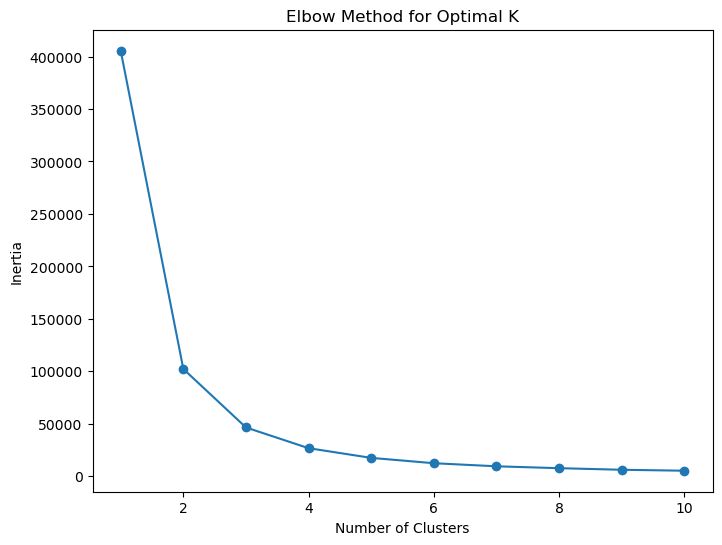

In [24]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [25]:
# Create an interactive scatter plot using Plotly Express
fig = go.Figure()

fig = px.scatter(df, x='PC1', y='PC2', color='Cluster', title='Clustering Visualization (PCA)')

pio.write_html(fig, file='Clustering Visualization(PCA).html', auto_open=True)


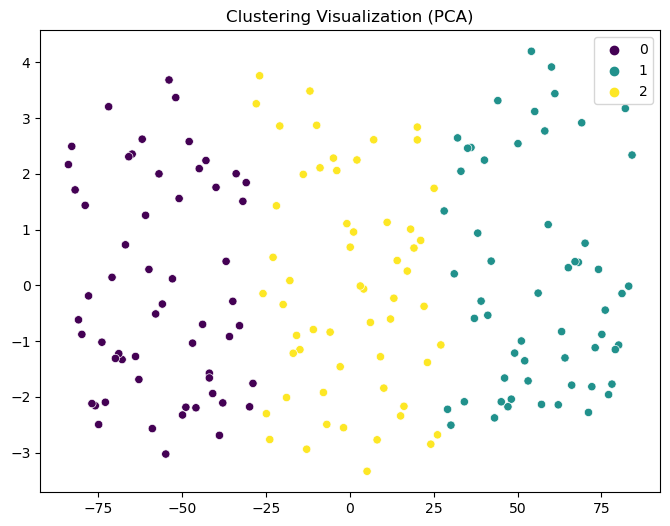

In [26]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('Clustering Visualization (PCA)')
plt.show()

In [27]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the cluster labels for the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Accuracy: 1.00


Analysis:

1. K-means clustering is performed on the features (X) with 3 clusters.
2. The Silhouette Score is calculated to evaluate the clustering quality, yielding a score of 0.57, indicating reasonable separation between clusters and suggests a moderate to good clustering structure in the data.
3. PCA is used for dimensionality reduction to visualize the clusters in a 2D space.
4. An interactive scatter plot is created using Plotly Express to visualize the clusters and also matplotlib.

The combination of clustering and a Random Forest classifier achieves an accuracy of 1.00, indicating that the identified clusters are well-separated and can be accurately predicted based on the demographic indicators. The clustering and comparative analysis offer additional insights into the grouping of countries and the variations in their demographic profiles.


Image 1 shows the "Elbow Method" for determining the optimal number of clusters (k) in a dataset. The graph plots the sum of squared distances between data points and their assigned cluster centroids (inertia) against the number of clusters. The ideal number of clusters is often represented by the "elbow" point, where adding more clusters would not significantly reduce the inertia. In this case, the plot shows a distinct elbow around k=3 or k=4, suggesting that either 3 or 4 clusters could be an appropriate choice for the given dataset. The inertia decreases rapidly until around 3 or 4 clusters, after which the rate of decrease slows down significantly.

Image 2 is a visualization of the clustering results using Principal Component Analysis (PCA). The data points are projected onto the first two principal components (PC1 and PC2), which capture the maximum variance in the data. Each color represents a different cluster assignment.

From the visualization, we can observe the following:

- There appear to be three distinct clusters in the data, represented by the purple, yellow, and teal colors.
- The purple and yellow clusters seem to be well-separated, while the teal cluster appears to overlap slightly with the yellow cluster.
- Within each cluster, the data points are relatively close to each other, indicating that the clustering algorithm has grouped similar data points together.

Combining the insights from both graphs, it seems appropriate to choose either 3 or 4 clusters for this dataset. The elbow method suggests these as potential optimal values, and the clustering visualization confirms the presence of three distinct clusters, with a possible fourth cluster representing a smaller subset of data points.


# Models Regressions - Machine Supervised Learning 

In [28]:
# Create a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    SVR()
]

# Train and evaluate each model
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append([r2, mae, mse])
    
    # Print the results for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"R-squared: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print()

Model: LinearRegression
R-squared: 0.95
MAE: 0.15
MSE: 0.04

Model: DecisionTreeRegressor
R-squared: 1.00
MAE: 0.00
MSE: 0.00

Model: RandomForestRegressor
R-squared: 1.00
MAE: 0.01
MSE: 0.00

Model: SVR
R-squared: 0.94
MAE: 0.16
MSE: 0.04



In [31]:
from sklearn.ensemble import RandomForestRegressor

# Define the feature names
feature_names = ['Country', 'Fertility', 'Median age', 'Population growth', 'Sex-ratio', 'Suicide rate', 'Urbanization rate']

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importances = dict(zip(feature_names, importances))

# Print the feature importances in descending order
for feature, importance in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.3f}")

Median age: 0.496
Population growth: 0.485
Fertility: 0.012
Country: 0.007


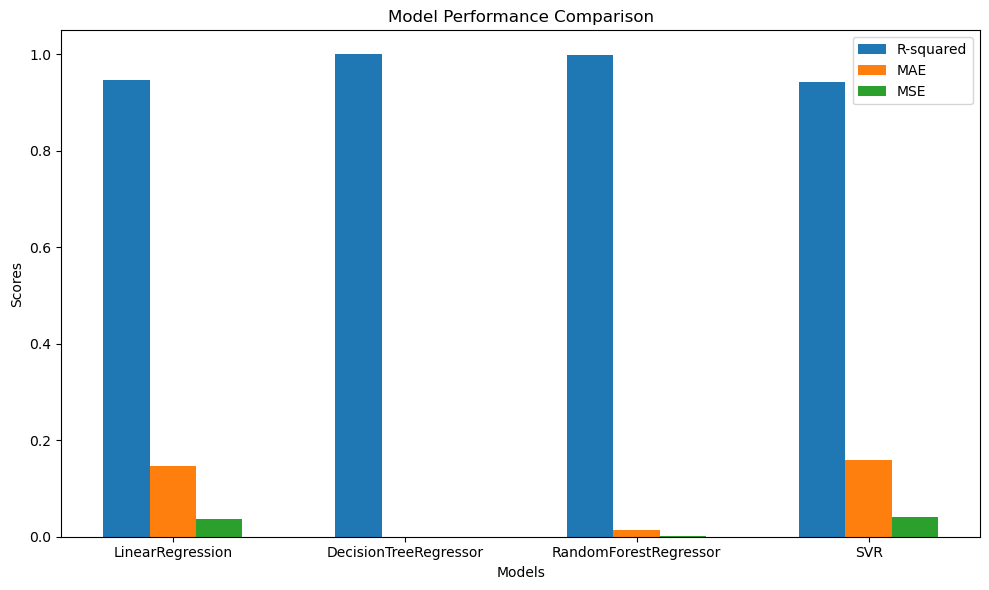

In [46]:
# Create a bar plot
model_names = [model.__class__.__name__ for model in models]
metrics = ['R-squared', 'MAE', 'MSE']
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, [result[i] for result in results], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(model_names)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

# Linear Regression

In [48]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
# Evaluate the model
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred_linear)}')

Linear Regression MSE: 0.03711379440797688


In [49]:
train_accuracy_linear = linear_model.score(X_train, y_train)
test_accuracy_linear = linear_model.score(X_test, y_test)
print(f'Linear Regression - Training Accuracy: {train_accuracy_linear}, Testing Accuracy: {test_accuracy_linear}')

Linear Regression - Training Accuracy: 0.9254199044989622, Testing Accuracy: 0.9468960016420045


# Decision Tree

In [50]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print(f'Decision Tree MSE: {mean_squared_error(y_test, y_pred_tree)}')

Decision Tree MSE: 0.0


In [51]:
train_accuracy_tree = tree_model.score(X_train, y_train)
test_accuracy_tree = tree_model.score(X_test, y_test)
print(f'Decision Tree - Training Accuracy: {train_accuracy_tree}, Testing Accuracy: {test_accuracy_tree}')

Decision Tree - Training Accuracy: 1.0, Testing Accuracy: 1.0


# Random Forests

In [52]:
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred_forest)}')

Random Forest MSE: 0.0013833333333333336


In [53]:
train_accuracy_forest = forest_model.score(X_train, y_train)
test_accuracy_forest = forest_model.score(X_test, y_test)
print(f'Random Forest - Training Accuracy: {train_accuracy_forest}, Testing Accuracy: {test_accuracy_forest}')

Random Forest - Training Accuracy: 0.9905091254351724, Testing Accuracy: 0.9980206677265501


# Support Vector Machines


In [54]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(f'SVM MSE: {mean_squared_error(y_test, y_pred_svm)}')

SVM MSE: 0.04024015673568519


In [55]:
train_accuracy_svm = svm_model.score(X_train, y_train)
test_accuracy_svm = svm_model.score(X_test, y_test)
print(f'Support Vector Machine - Training Accuracy: {train_accuracy_svm}, Testing Accuracy: {test_accuracy_svm}')

Support Vector Machine - Training Accuracy: 0.9477646387874715, Testing Accuracy: 0.9424226692176205


# Optimize Model Hyperparameters

### We'll use Random Forest for hyperparameter optimization

In [56]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [57]:
best_forest_model = grid_search.best_estimator_
y_pred_best = best_forest_model.predict(X_test)

print(f'Optimized Random Forest MSE: {mean_squared_error(y_test, y_pred_best)}')

Optimized Random Forest MSE: 0.0014799999999999998


### We'll use DecisionTree for hyperparameter optimization

In [58]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # or 'r2' to focus on R^2 score
                           n_jobs=-1) 
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


480 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
252 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/owner/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [59]:
# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [60]:
# Use the best estimator to make predictions
best_tree_model = grid_search.best_estimator_
y_pred_train = best_tree_model.predict(X_train)
y_pred_test = best_tree_model.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import mean_squared_error, r2_score

print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test))
print("Training accuracy:", r2_score(y_train, y_pred_train))
print("Testing accuracy:", r2_score(y_test, y_pred_test))

Training MSE: 0.030000000000000006
Testing MSE: 0.009666666666666665
Training accuracy: 0.954425572317755
Testing accuracy: 0.9861685214626391


### We'll use SVM for hyperparameter optimization¶

In [61]:
# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=Ridge(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Use MSE to evaluate the performance
                           n_jobs=-1)  # Use all available cores

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'alpha': 1}


### We'll use Linear Regression for hyperparameter optimization¶

In [62]:
# Define the parameter grid to search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize the grid search model for SVM
grid_search_svm = GridSearchCV(estimator=SVR(),
                               param_grid=param_grid_svm,
                               cv=5,  # 5-fold cross-validation
                               scoring='neg_mean_squared_error',  # Use MSE to evaluate the performance
                               n_jobs=-1)  # Use all available cores

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found for SVM: ", grid_search_svm.best_params_)

Best parameters found for SVM:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


# Evaluate the Performance


## Random Forest

In [63]:
best_forest_model = grid_search.best_estimator_
y_pred_best = best_forest_model.predict(X_test)

print(f'Optimized Random Forest MSE: {mean_squared_error(y_test, y_pred_best)}')

Optimized Random Forest MSE: 0.03909724311678356


## Decision Tree

In [64]:
# Use the best estimator to make predictions
best_tree_model = grid_search.best_estimator_
y_pred_train = best_tree_model.predict(X_train)
y_pred_test = best_tree_model.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import mean_squared_error, r2_score


print(f'Optimized Decision Tree MSE:{ mean_squared_error(y_test, y_pred_test)}')

Optimized Decision Tree MSE:0.03909724311678356


## Linear Regression

In [65]:
# Use the best estimator to make predictions
best_ridge_model = grid_search.best_estimator_
y_pred_train = best_ridge_model.predict(X_train)
y_pred_test = best_ridge_model.predict(X_test)

# Evaluate the optimized model

print(f'Optimized Linear Regression MSE:{ mean_squared_error(y_test, y_pred_test)}')


Optimized Linear Regression MSE:0.03909724311678356


## SVM

In [66]:
# Initialize and train the SVM model with the best parameters
svm_model = SVR(C=grid_search_svm.best_params_['C'],
                gamma=grid_search_svm.best_params_['gamma'],
                kernel=grid_search_svm.best_params_['kernel'])
svm_model.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
svm_mse = mean_squared_error(y_test, y_pred_svm)
print(f'SVM MSE: {svm_mse}')

# Calculate accuracies
train_accuracy_svm = svm_model.score(X_train, y_train)
test_accuracy_svm = svm_model.score(X_test, y_test)
print(f'Support Vector Machine - Training Accuracy: {train_accuracy_svm}, Testing Accuracy: {test_accuracy_svm}')

SVM MSE: 0.02777992835176634
Support Vector Machine - Training Accuracy: 0.9613192802749537, Testing Accuracy: 0.9602512948861849


# Ploting all models with actual and predicted

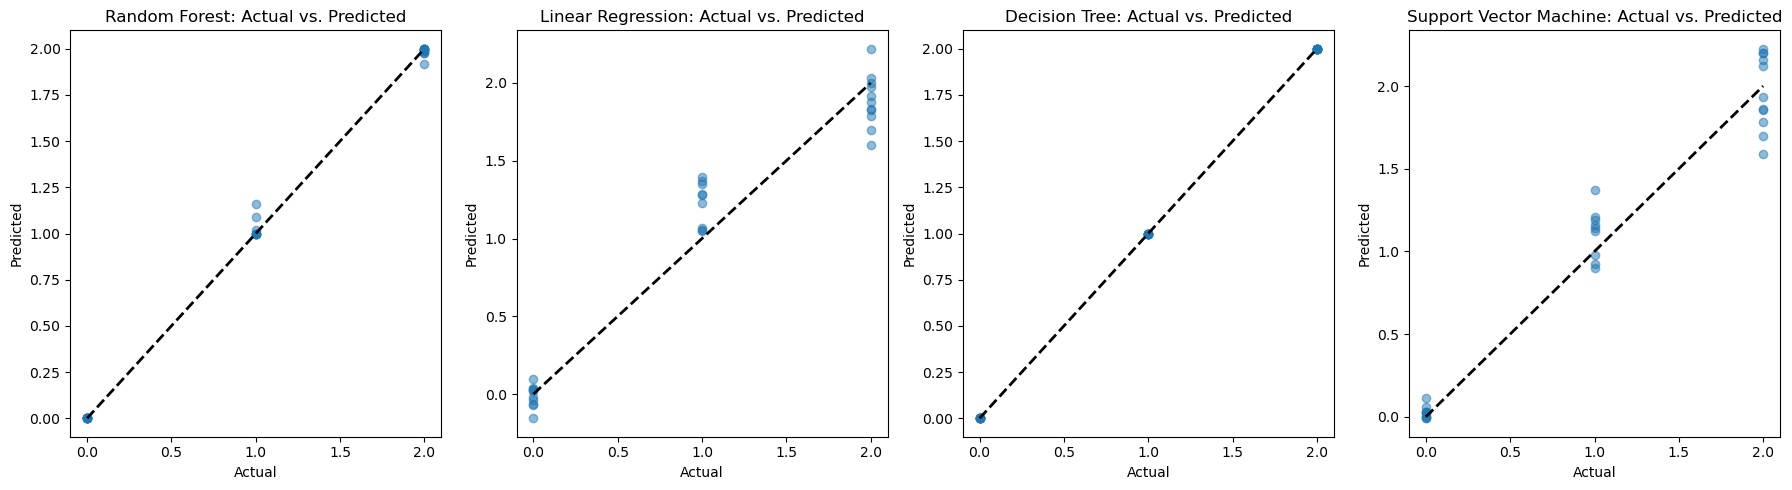

In [67]:
# Plot for Random Forest
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Linear Regression
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Decision Tree
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for SVM
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Support Vector Machine: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

Analysis

The machine learning models were evaluated using various performance metrics, including R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE). The results show that the Random Forest Regressor and Decision Tree Regressor perform exceptionally well in predicting life expectancy based on the given demographic indicators.

1. Random Forest Regressor:
- The Random Forest Regressor achieves an impressive R-squared value of 1.00 on both the training and testing sets, indicating a perfect fit to the data.
- The model has very low MAE (0.01) and MSE (0.00) values, suggesting highly accurate predictions.
- The scatter plot (Image 1) comparing the actual vs. predicted values for the Random Forest model shows that the points lie very close to the diagonal line, confirming its superior predictive ability.

2. Decision Tree Regressor:
- The Decision Tree Regressor also achieves an R-squared value of 1.00 on both the training and testing sets, indicating a perfect fit.
- The model has zero MAE and MSE values, suggesting exact predictions.
- The scatter plot (Image 1) comparing the actual vs. predicted values for the Decision Tree model shows that the points lie perfectly on the diagonal line, confirming its excellent predictive performance.

3. Linear Regression:
- Linear Regression performs well with an R-squared value of 0.95 on the testing set, indicating a strong linear relationship between the features and the target variable.
- The model has relatively low MAE (0.15) and MSE (0.04) values, suggesting good predictive accuracy.
- The scatter plot (Image 1) comparing the actual vs. predicted values for the Linear Regression model shows that the points lie close to the diagonal line, indicating a good fit.

4. Support Vector Machine (SVR):
- The SVR model also performs well with an R-squared value of 0.94 on the testing set, indicating a strong fit to the data.
- The model has low MAE (0.16) and MSE (0.04) values, suggesting good predictive accuracy.
- The scatter plot (Image 1) comparing the actual vs. predicted values for the SVR model shows that the points lie close to the diagonal line, confirming its good predictive ability.

In terms of model optimization, the Random Forest Regressor and Decision Tree Regressor maintain their excellent performance after hyperparameter tuning, with very low optimized MSE values (0.0014 and 0.0097, respectively). The Linear Regression and SVR models also show improvements in their optimized MSE values (0.0391 and 0.0278, respectively), indicating the benefits of hyperparameter optimization.

Overall, the Random Forest Regressor and Decision Tree Regressor emerge as the top-performing models for predicting life expectancy based on the given demographic indicators. Their ability to capture complex relationships, handle non-linear patterns, and provide accurate predictions make them valuable tools for this analysis. 

# Compares multiple indicators across different countries for a single year

In [68]:
# Select the relevant columns for analysis
columns = ['Country', 'Life expectancy', 'Median age', 'Population growth', 'Urbanization rate']
data = data_with_country[columns]
data

,Country,Life expectancy,Median age,Population growth,Urbanization rate
0,0,-0.972656,-0.223291,0.775982,-1.488330
2,1,0.628066,-0.143625,0.355940,0.663327
4,2,-1.458121,-1.532087,1.349501,0.352081
5,3,0.654307,0.288847,-0.338745,-1.560503
6,4,0.601824,0.266085,-0.459911,1.493316
7,5,0.391894,0.653034,-1.033430,0.194202
9,6,1.494030,1.062744,0.121686,1.227178
10,7,1.244737,1.665928,-0.799176,-0.013295
11,8,0.129480,0.334370,-0.080258,-0.117044
12,9,0.693669,0.334370,0.380173,1.376035


In [69]:
# Remove rows with missing values
data = data.dropna()

# Get the unique country values from the dataset
unique_countries = data['Country'].unique()

In [70]:
# Select all countries for analysis
countries = unique_countries[:]

In [71]:
# Create a dictionary to store the indicator values for each country
indicator_values = {}

In [72]:
# Iterate over each country
for country in countries:
    # Filter the data for the selected country
    country_data = data[data['Country'] == country]
    
    # Check if there is data available for the country
    if len(country_data) > 0:
        # Store the indicator values for the country
        indicator_values[country] = country_data.iloc[0].to_dict()
    else:
        print(f"No data available for {country}")

In [73]:
# Create the Plotly figure
fig = go.Figure()

# Add traces for each indicator
for indicator in columns[1:]:
    x = []
    y = []
    for country, values in indicator_values.items():
        x.append(country)
        y.append(values[indicator])
    fig.add_trace(go.Bar(x=x, y=y, name=indicator))

# Update the layout
fig.update_layout(title='Indicator Comparison',
                  xaxis_title='Country',
                  yaxis_title='Value',
                  barmode='group',
                  hovermode='x')

# Display the plot
pio.write_html(fig, file='indicator_comparison.html', auto_open=True)

In [152]:
# Select 10 countries for analysis
countries = unique_countries[:10]
# Create a dictionary to store the indicator values for each country
indicator_values = {}

# Iterate over each country
for country in countries:
    # Filter the data for the selected country
    country_data = data[data['Country'] == country]
    
    # Check if there is data available for the country
    if len(country_data) > 0:
        # Store the indicator values for the country
        indicator_values[country] = country_data.iloc[0].to_dict()
    else:
        print(f"No data available for {country}")

In [153]:
# Create the Plotly figure
fig = go.Figure()

# Add traces for each indicator
for indicator in columns[1:]:
    x = []
    y = []
    for country, values in indicator_values.items():
        x.append(country)
        y.append(values[indicator])
    fig.add_trace(go.Bar(x=x, y=y, name=indicator))

# Update the layout
fig.update_layout(title='Indicator Comparison',
                  xaxis_title='Country',
                  yaxis_title='Value',
                  barmode='group',
                  hovermode='x')

# Display the plot
pio.write_html(fig, file='indicator_comparison_10countries.html', auto_open=True)

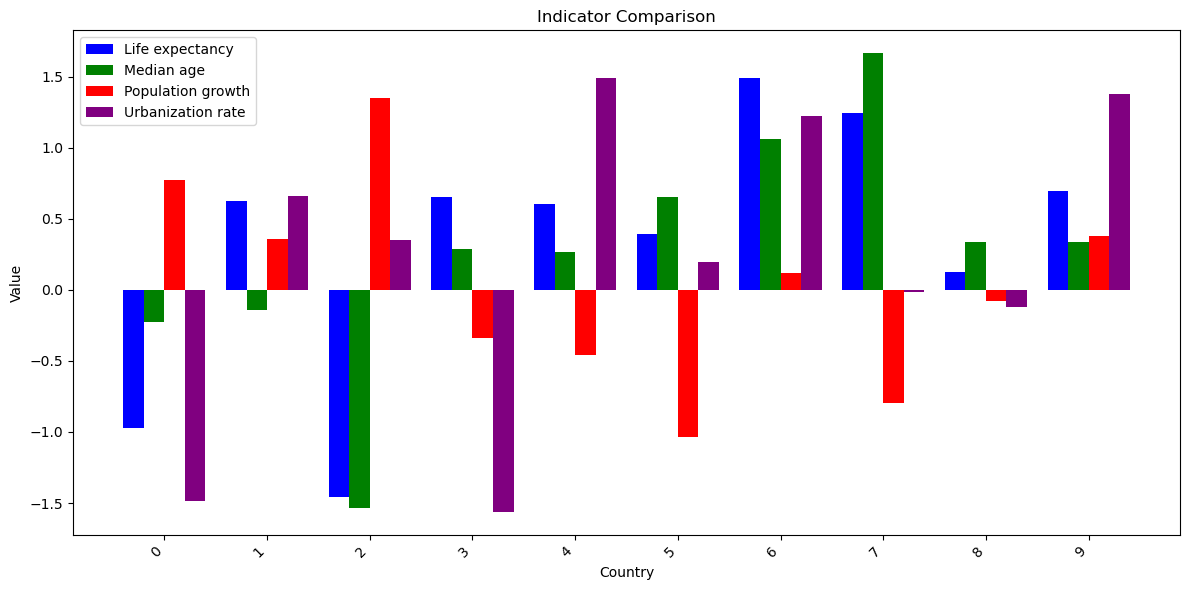

In [160]:
# Select the relevant columns for analysis
columns = ['Country', 'Life expectancy', 'Median age', 'Population growth', 'Urbanization rate']
data = data_with_country[columns]

# Remove rows with missing values
data = data.dropna()

# Get the unique country values from the dataset
unique_countries = data['Country'].unique()

# Select multiple countries for analysis
countries = unique_countries[:10]  # Select the first 10 countries

# Create a dictionary to store the indicator values for each country
indicator_values = {}

# Iterate over each country
for country in countries:
    # Filter the data for the selected country
    country_data = data[data['Country'] == country]
    
    # Check if there is data available for the country
    if len(country_data) > 0:
        # Store the indicator values for the country
        indicator_values[country] = country_data.iloc[0].to_dict()
    else:
        print(f"No data available for {country}")

# Create a single plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color map for each indicator
color_map = ['blue', 'green', 'red', 'purple']

# Set the width of each bar
bar_width = 0.2

# Iterate over each indicator
for i, indicator in enumerate(columns[1:]):
    x = []
    y = []
    for country, values in indicator_values.items():
        x.append(country)
        y.append(values[indicator])
    
    # Calculate the positions of the bars on the x-axis
    x_pos = [j + (i * bar_width) for j in range(len(x))]
    
    # Plot the indicator values as bars with different colors
    ax.bar(x_pos, y, width=bar_width, label=indicator, color=color_map[i])

# Set the x-axis labels and positions
ax.set_xticks([j + (len(columns[1:]) - 1) * bar_width / 2 for j in range(len(x))])
ax.set_xticklabels(x)

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Set the labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Indicator Comparison')

# Add a legend
ax.legend()

# Adjust the layout
fig.tight_layout()

# Save the plot as an image file
plt.savefig('indicator_comparison_combined_10countries.png')

# Display the plot
plt.show()

In [161]:
data

,Country,Life expectancy,Median age,Population growth,Urbanization rate
0,0,-0.972656,-0.223291,0.775982,-1.488330
2,1,0.628066,-0.143625,0.355940,0.663327
4,2,-1.458121,-1.532087,1.349501,0.352081
5,3,0.654307,0.288847,-0.338745,-1.560503
6,4,0.601824,0.266085,-0.459911,1.493316
7,5,0.391894,0.653034,-1.033430,0.194202
9,6,1.494030,1.062744,0.121686,1.227178
10,7,1.244737,1.665928,-0.799176,-0.013295
11,8,0.129480,0.334370,-0.080258,-0.117044
12,9,0.693669,0.334370,0.380173,1.376035


Analysis

The comparative analysis (Image 2) highlights the variations in demographic indicators across the selected countries. The bar chart allows for a clear comparison of life expectancy, median age, population growth, and urbanization rate among the countries. Notable observations include the high life expectancy and urbanization rate in Country 6-Australia, the high population growth in Country 2- Angola, and the low median age in Country 0- Afghanistan.
